In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Ng = 64 #number of points
LL = 1.0#2 * np.pi #interval of data


k = np.asarray(list(np.arange(0, Ng // 2,1/Ng)) + [0] + list(np.arange(-Ng // 2 + 1,0,1/Ng)))
[Kx,Ky]=np.array( np.meshgrid ( k , k ,indexing ='ij') , dtype = int )

f = lambda x: np.sin((2*np.pi/LL)*x)
df_analytical = lambda x: (2*np.pi/LL)*np.cos((2*np.pi/LL)*x)

f(Kx).shape


(4033, 4033)

In [3]:
np.max(df_analytical(Kx)),np.min(df_analytical(Kx)),np.max(Kx),np.min(Kx)

(6.283185307179586, 6.283185307179586, 31, -31)

https://stackoverflow.com/questions/29189885/finding-the-derivative-of-a-2d-function-using-fft-properties

https://math.stackexchange.com/questions/1473277/taking-partial-derivative-via-fourier-transform-using-matlab

In [4]:
# 1 D
N = 64 #number of points
L = 2 * np.pi #interval of data

x = np.arange(0.0, L, L/float(N)) #this does not include the endpoint

k=np.fft.fftfreq(N,1/N)
#k= np.asarray(list(range(0, N // 2)) + [0] + list(range(-N // 2 + 1,0)))
k = (2 * np.pi / L)*k

X=x#X,Y = np.meshgrid ( x , x )
data_spacedomain = np.sin(X*2*np.pi/L);
dy_analytical=np.cos(X*2*np.pi/L)*2*np.pi/L
#% Compute 2D FFT
data_wavenumberdomain = np.fft.fftn(data_spacedomain);

#% Compute grid of wavenumbers
KX=k#KX, KY = np.meshgrid (k, k , indexing ='ij');

#% Compute 2D derivative
data_wavenumberdomain_differentiated =  1j*KX*data_wavenumberdomain; 
#% Convert back to space domain
data_spacedomain_differentiated = np.real(np.fft.ifftn(data_wavenumberdomain_differentiated ));

np.max(data_spacedomain_differentiated-dy_analytical)

1.2434497875801753e-14

In [5]:
# n D (2D)
N = 128 #number of points
L = 2 * np.pi #interval of data

x = np.arange(0.0, L, L/float(N)) #this does not include the endpoint

k=np.fft.fftfreq(N,1/N)
k = (2 * np.pi / L)*k

X,Y = np.meshgrid ( x , x )
data_spacedomain = np.sin(X*2*np.pi/L);
dy_analytical=np.cos(X*2*np.pi/L)*2*np.pi/L
#% Compute 2D FFT
data_wavenumberdomain = np.fft.fftn(data_spacedomain);

#% Compute grid of wavenumbers
KX, KY = np.meshgrid (k, k );

#% Compute 2D derivative
data_wavenumberdomain_differentiated =  1j*KX*data_wavenumberdomain; 
#% Convert back to space domain
data_spacedomain_differentiated = np.real(np.fft.ifftn(data_wavenumberdomain_differentiated ));

np.max(data_spacedomain_differentiated-dy_analytical)

2.7755575615628914e-14

In [6]:
# n D (3D)
N = 128 #number of points
L = 2 * np.pi #interval of data

x = np.arange(0.0, L, L/float(N)) #this does not include the endpoint

k=np.fft.fftfreq(N,1/N)
k = (2 * np.pi / L)*k

X,Y,Z = np.meshgrid ( x , x, x )
data_spacedomain = np.sin(X*2*np.pi/L);
dy_analytical=np.cos(X*2*np.pi/L)*2*np.pi/L
#% Compute 2D FFT
data_wavenumberdomain = np.fft.fftn(data_spacedomain);

#% Compute grid of wavenumbers
KX, KY, KZ = np.meshgrid (k, k, k );

#% Compute 2D derivative
data_wavenumberdomain_differentiated =  1j*KX*data_wavenumberdomain; 
#% Convert back to space domain
data_spacedomain_differentiated = np.real(np.fft.ifftn(data_wavenumberdomain_differentiated ));

np.max(data_spacedomain_differentiated-dy_analytical)

2.7755575615628914e-14

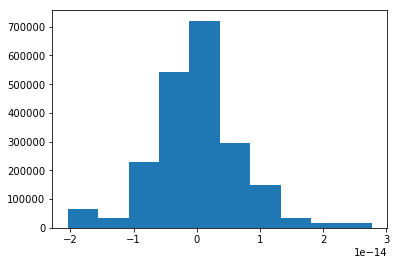

In [7]:
plt.hist((data_spacedomain_differentiated-dy_analytical).ravel() )
pass